In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

from sklearn import model_selection
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import (KNeighborsClassifier, KNeighborsRegressor)
# https://stackoverflow.com/questions/25336176/does-scikit-learn-include-a-naive-bayes-classifier-with-continuous-inputs
from sklearn.naive_bayes import GaussianNB
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC, SVR
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor)
import xgboost
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate
from tabulate import tabulate
from operator import itemgetter

# https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit

# Irish Data and models

In [2]:
df_ireland = pd.read_csv("data/final/df_final_irish_beef_feat_cols_and_target_values_1999-2022.csv")

In [3]:
df_ireland

,Unnamed: 0,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,...,pork_loin_chops_per_kg,pork_sausages_per_kg,pork_steak_per_kg,potatoes_10_kg,sherry_take_home_75cl_bottle,sirloin_steak_per_kg,stout_draught_bar_1_pint,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle
0,1999-01-31,136.83,139.73,133.33,131.07,127.16,120.83,121.28,119.78,83.25,...,6.83387,3.92049,10.11682,6.99516,10.01776,10.42162,2.66192,2.36474,15.45209,17.31772
1,1999-02-28,143.80,140.10,130.93,126.85,122.36,121.99,118.89,122.60,72.94,...,6.92023,3.88620,10.05459,7.10311,10.18159,10.53465,2.66192,2.29743,15.46860,17.31645
2,1999-03-31,146.38,133.37,126.74,121.88,121.34,120.37,123.38,120.78,88.66,...,7.21741,3.89382,9.99236,7.06755,10.20953,10.41908,2.66192,2.10820,15.46098,17.31645
3,1999-04-30,141.20,131.58,121.23,119.14,120.69,124.75,122.41,122.15,76.94,...,7.18693,3.90017,9.81202,6.92150,10.24001,10.65911,2.69240,2.35077,15.42796,17.32788
4,1999-05-31,136.09,122.94,116.59,121.77,123.92,122.61,124.88,121.30,114.15,...,7.30631,3.92303,10.02411,6.83387,10.21715,10.78738,2.73558,2.13360,15.54480,17.63776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2021-10-31,172.03,196.88,185.30,198.15,203.87,201.15,203.94,199.58,222.61,...,7.54300,6.22100,7.84500,7.63800,14.04300,14.20900,4.95000,3.36400,20.49700,25.05500
274,2021-11-30,169.93,174.18,196.74,203.66,199.36,197.53,205.40,204.63,194.16,...,7.39400,6.18800,8.72500,7.63800,14.04300,14.20900,4.94800,3.36800,19.40400,22.93100
275,2021-12-31,210.53,200.10,191.37,208.82,204.46,203.70,201.86,207.42,211.98,...,7.56400,6.22100,7.40200,7.63800,14.04300,14.25800,4.94300,3.37600,18.68800,22.37900
276,2022-01-31,204.89,215.17,221.32,225.42,212.41,223.02,224.50,214.11,245.92,...,7.46200,6.20800,8.37200,7.63800,14.04300,14.25800,4.94600,3.22800,24.54400,27.65700


In [4]:
df_ireland = df_ireland.rename(columns={'Unnamed: 0':"date"})

In [5]:
df_ireland = df_ireland.set_index("date")

In [6]:
df_ireland.columns.sort_values()

Index(['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg',
       'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg',
       'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
       'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
       'bullocks_500-549kg', 'bullocks_550kg+', 'butter_per_lb',
       'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg',
       'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity',
       'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers',
       'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg',
       'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
       'heifers_350-399kg', 'heifers_400-449kg', 'irish_cheddar_per_kg',
       'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_ch

In [7]:
# these features combind make up the target_cattle target value so they are leaky features
# this basically means including them in the model training would be giving the model future information
# which we couldn't expect to have at the testing phase or whenver we try to do a prediction on new data
leakey_features=[
    'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
    'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
    'bullocks_500-549kg', 'bullocks_550kg+',
    'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
    'heifers_350-399kg', 'heifers_400-449kg']

In [8]:
y_col="target_cattle"

In [9]:
feature_cols = []
for col in df_ireland.columns:
    if col not in leakey_features:
        feature_cols.append(col)
feature_cols = sorted(feature_cols)
print(feature_cols)

['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg', 'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg', 'butter_per_lb', 'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals', 'compound_feeding_stuffs_for_cattle_excluding_calves', 'compound_feeding_stuffs_for_pigs', 'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg', 'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity', 'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers', 'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg', 'irish_cheddar_per_kg', 'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_chops_per_kg', 'lambs_liver_per_kg', 'marmalade_per_lb', 'milk', 'motor_fuel', 'mushrooms_per_kg', 'npk_fertilisers', 'onions_per_kg', 'other_goods_and_services', 'pbeefusdm', 'petrol', 'petrol_unleaded_per_ltr', 'pigs', 'pk_fertilisers', 'plant_protection_products', 'pork_loin_chops_per_kg', 'pork_sausages_per_kg', 'pork_steak_per_kg', 'potatoes', 'potatoes_10_kg', 'poultry', 'rai

In [10]:
feature_cols.remove(y_col)

In [11]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(df_ireland[feature_cols], df_ireland[y_col], test_size=0.3, random_state=42)

In [58]:
split = int(len(df_ireland) * 0.7)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [17]:
bm = DummyRegressor()
bm.fit(X_train, y_train)
bm.score(X_test, y_test) # accuracy

-5.365232519180302

In [18]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [19]:
X = df_ireland[feature_cols]
y = df_ireland[y_col]

https://scikit-learn.org/stable/modules/model_evaluation.html
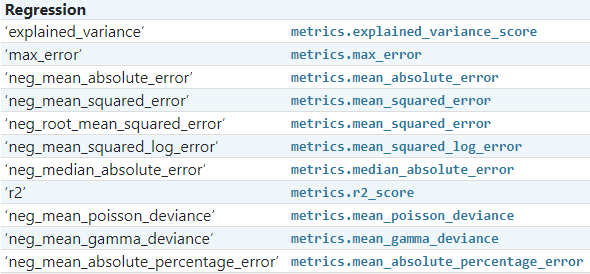

## Model training

In [22]:
max_year = int(X.index.max()[:4]) 
min_year = int(X.index.min()[:4])
print("max", max_year)
print("min", min_year)
cv_splits= max_year - min_year - 1
print("cv_splits", cv_splits)

max 2022
min 1999
cv_splits 22


In [25]:
for model in [
    DummyRegressor,
    LinearRegression,
    DecisionTreeRegressor,
    KNeighborsRegressor,
    BayesianRidge,
    SVR,
    RandomForestRegressor,
    xgboost.XGBRegressor,
    ]:
    
    cls = model()
    kfold = model_selection.KFold(n_splits=10) # , random_state=42
    s = model_selection.cross_val_score(cls, X, y, scoring="r2", cv=kfold)
    
    print(
    f"{model.__name__:22} r2: "
    f"{s.mean():.3f} STD: {s.std():.2f}"
    )

DummyRegressor         r2: -15.617 STD: 19.50
LinearRegression       r2: -25.126 STD: 51.07
DecisionTreeRegressor  r2: -4.083 STD: 5.45
KNeighborsRegressor    r2: -6.379 STD: 13.24
BayesianRidge          r2: -5.563 STD: 7.86
SVR                    r2: -11.180 STD: 20.15
RandomForestRegressor  r2: -3.226 STD: 4.52
XGBRegressor           r2: -1.846 STD: 2.96


In [26]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-fa-model-selection-py

In [55]:
# https://goldinlocks.github.io/Time-Series-Cross-Validation/ 
results = []
for model in [
    DummyRegressor,
    LinearRegression,
    DecisionTreeRegressor,
    KNeighborsRegressor,
    BayesianRidge,
    SVR,
    RandomForestRegressor,
    xgboost.XGBRegressor,
    LGBMRegressor,
    #CatBoostRegressor,
    SGDRegressor,
    KernelRidge,
    #ElasticNet,
    GradientBoostingRegressor
    ]:
    
    cls = model()
    
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    
    scoring = ( 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_error')
    print("Train model:", model.__name__)
    scores = cross_validate(cls, X=X, y=y, cv=tscv, scoring=scoring, return_train_score=True)
    
    results.append([
        model.__name__,
        f"{scores['train_r2'].mean():.3f}",
        f"{scores['test_r2'].mean():.3f}",
        f"{scores['train_neg_mean_absolute_error'].mean():.3f}",
        f"{scores['test_neg_mean_absolute_error'].mean():.3f}",
        f"{scores['train_neg_mean_squared_error'].mean():.3f}",
        f"{scores['test_neg_mean_squared_error'].mean():.3f}",

    ])

Train model: DummyRegressor
Train model: LinearRegression
Train model: DecisionTreeRegressor
Train model: KNeighborsRegressor
Train model: BayesianRidge
Train model: SVR
Train model: RandomForestRegressor
Train model: XGBRegressor
Train model: LGBMRegressor
Train model: SGDRegressor
Train model: KernelRidge
Train model: GradientBoostingRegressor


In [56]:
results = sorted(results, key=itemgetter(2), reverse=True) # sort table by test_r2   
print(tabulate(results, headers=["model", "tr_r2", "r2", "tr_mae", "mae", "tr_mse", "mse"]))

model                             tr_r2             r2         tr_mae            mae          tr_mse             mse
-------------------------  ------------  -------------  -------------  -------------  --------------  --------------
LGBMRegressor               0.853         -8.789         -2.201        -11.098         -17.495        -204.788
KernelRidge                 0.971         -7.134         -2.499        -13.996         -12.804        -491.633
KNeighborsRegressor         0.903         -6.379         -3.866        -13.406         -33.759        -318.082
BayesianRidge               0.947         -5.563         -3.296        -12.838         -20.455        -390.837
RandomForestRegressor       0.992         -3.443         -1.148        -10.699          -2.969        -206.527
DecisionTreeRegressor       1             -3.039          0            -11.637           0            -275.412
LinearRegression            0.981        -25.126         -2.047        -18.302          -9.931      

In [60]:
# https://goldinlocks.github.io/Time-Series-Cross-Validation/ 

# https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e

results = []
for model in [
    #DummyRegressor,
    #LinearRegression,
    #DecisionTreeRegressor,
    #KNeighborsRegressor,
    #BayesianRidge,
    #SVR,
    RandomForestRegressor,
    #xgboost.XGBRegressor,
    #LGBMRegressor,
    ##CatBoostRegressor,
    #SGDRegressor,
    #KernelRidge,
    ##ElasticNet,
    #GradientBoostingRegressor
    ]:
    
    cls = model()
    
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    for tr_index, val_index in tscv.split(X_train):
        X_tr, X_val = X_train[tr_index], X_train[val_index]
        y_tr, y_val = y_train[tr_index], y_train[val_index]
        
        scoring = ( 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_error')
        print("Train model:", model.__name__)
        cls.fit(X_tr, y_tr)
        y_true = y_val.values
        y_pred = best_model.predict(X_val)
        
        r2 = metrics.r2_score(y_true, y_pred)
        mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
        mse=metrics.mean_squared_error(y_true, y_pred) 
        
        results.append([
            model.__name__,
            f"{r2:.3f}",
            f"{mean_absolute_error:.3f}",
            f"{mse:.3f}",
        ])

KeyError: "None of [Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')] are in the [columns]"

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
i = 1
score = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train[tr_index], X_train[val_index]
    y_tr, y_val = y_train[tr_index], y_train[val_index]
    for mf in np.linspace(100, 150, 6):
        for ne in np.linspace(50, 100, 6):
            for md in np.linspace(20, 40, 5):
                for msl in np.linspace(30, 100, 8):
                    rfr = RandomForestRegressor(
                        max_features=int(mf),
                        n_estimators=int(ne),
                        max_depth=int(md),
                        min_samples_leaf=int(msl))
                    rfr.fit(X_tr, y_tr)
                    score.append([i,
                                  mf, 
                                  ne,
                                  md, 
                                  msl, 
                                  rfr.score(X_val, y_val)])
    i += 1

In [ ]:
results = sorted(results, key=itemgetter(2), reverse=True) # sort table by test_r2   
print(tabulate(results, headers=["model", "r2", "mae", "mse"]))

In [35]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [36]:
from sklearn.model_selection import GridSearchCV

In [39]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [37]:
model = RandomForestRegressor()

param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}

tscv = TimeSeriesSplit(n_splits=cv_splits)

gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)


NameError: name 'regression_results' is not defined

In [40]:
regression_results(y_true, y_pred)

explained_variance:  0.2061
mean_squared_log_error:  0.0053
r2:  0.1788
MAE:  11.9936
MSE:  215.5078
RMSE:  14.6802


In [48]:
# https://goldinlocks.github.io/Time-Series-Cross-Validation/ 
results = []
for model in [
    #DummyRegressor,
    #LinearRegression,
    #DecisionTreeRegressor,
    #KNeighborsRegressor,
    #BayesianRidge,
    #SVR,
    #RandomForestRegressor,
    xgboost.XGBRegressor,
    #LGBMRegressor,
    ##CatBoostRegressor,
    #SGDRegressor,
    #KernelRidge,
    ##ElasticNet,
    #GradientBoostingRegressor
    ]:
    
    cls = model()
    
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    
    scoring = ( 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_error')
    print("Train model:", model.__name__)
    #scores = cross_validate(cls, X_train, y, cv=tscv, scoring=scoring, return_train_score=True)
    parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
    
    xgb_grid = GridSearchCV(cls,
                        parameters,
                        cv = tscv,
                        n_jobs = 5,
                        verbose=True)
    
    xgb_grid.fit(X_train, y_train)
    
    y_true = y_test.values
    y_pred = xgb_grid.predict(X_test)
    
    r2 = metrics.r2_score(y_true, y_pred)
    
    results.append([
        model.__name__,
        f"{r2:.3f}",
        #f"{scores['test_neg_mean_absolute_error'].mean():.3f}",
        #f"{scores['test_neg_mean_squared_error'].mean():.3f}",
    ])

Train model: XGBRegressor
Fitting 22 folds for each of 9 candidates, totalling 198 fits
[01:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [49]:
results = sorted(results, key=itemgetter(1), reverse=True) # sort table by r2   
print(tabulate(results, headers=["model", "r2"]))

model            r2
------------  -----
XGBRegressor  0.426
